<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/use_fingerprint_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [ ]:
photos = np.load('/content/drive/MyDrive/pic_train/finger_print_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/finger_print_labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(381, 150, 150, 3) (96, 150, 150, 3)
(381,) (96,)


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,8)
y_test = to_categorical(y_test,8)

print(y_train.shape,y_test.shape)

(381, 8) (96, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(8,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
6/6 [==============================] - 14s 241ms/step - loss: 3.0160 - accuracy: 0.1759
Epoch 2/20
6/6 [==============================] - 0s 45ms/step - loss: 2.0287 - accuracy: 0.1286
Epoch 3/20
6/6 [==============================] - 0s 43ms/step - loss: 1.9675 - accuracy: 0.1417
Epoch 4/20
6/6 [==============================] - 0s 43ms/step - loss: 1.9634 - accuracy: 0.1444
Epoch 5/20
6/6 [==============================] - 0s 43ms/step - loss: 1.9415 - accuracy: 0.1522
Epoch 6/20
6/6 [==============================] - 0s 43ms/step - loss: 1.9263 - accuracy: 0.1785
Epoch 7/20
6/6 [==============================] - 0s 43ms/step - loss: 1.9077 - accuracy: 0.1837
Epoch 8/20
6/6 [==============================] - 0s 42ms/step - loss: 1.8726 - accuracy: 0.2231
Epoch 9/20
6/6 [==============================] - 0s 43ms/step - loss: 1.8254 - accuracy: 0.2835
Epoch 10/20
6/6 [==============================] - 0s 43ms/step - loss: 1.7535 - accuracy: 0.3438
Epoch 11/20
6/6 [==========

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/finger.h5')

In [ ]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/finger.h5')

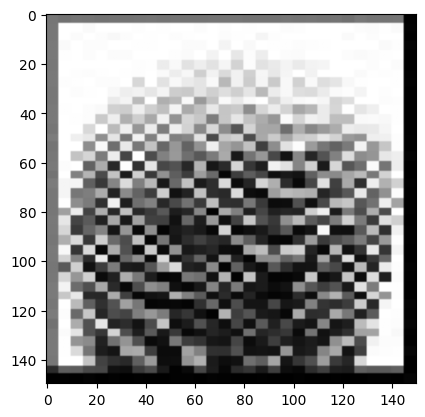

so: [0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 18ms/step
predict:  difficult [5.9184227e-18 3.8472433e-02 5.2675951e-01 1.6856005e-02 2.9687530e-01
 1.8540459e-02 1.0201792e-02 9.2294440e-02]


In [ ]:
digit = x_test[30]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[30])

classes = ['none', 'develop','difficult', 'lucky', 'normal', 'romantic', 'unknow', 'unlucky']
img = x_test[30]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

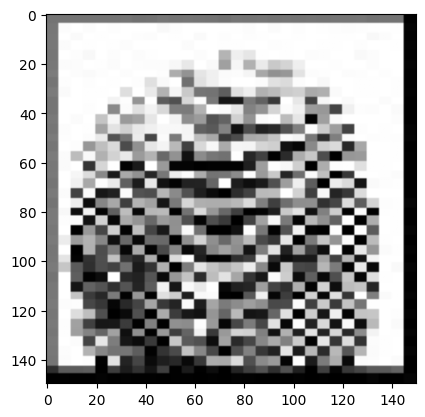

so: [0. 0. 0. 0. 1. 0. 0. 0.]
1/1 [==============================] - 0s 21ms/step
predict:  develop [6.7788501e-21 7.1531677e-01 5.0856128e-02 1.3648812e-01 9.2578363e-03
 2.8099271e-02 5.3968225e-02 6.0136295e-03]


In [ ]:
digit = x_test[60]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[60])

classes = ['none', 'develop','difficult', 'lucky', 'normal', 'romantic', 'unknow', 'unlucky']
img = x_test[60]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))